In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Use Pandas to read the SF crime data
mpls_crime_data_2015 = pd.read_csv("Mpls_Police_Incidents_2015.csv")
mpls_crime_data_2016 = pd.read_csv("Mpls_Police_Incidents_2016.csv")
mpls_crime_data_2017 = pd.read_csv("Mpls_Police_Incidents_2017.csv")
moon_data = pd.read_csv("moon_phases_2015 through 2017.csv")
moon_data.head()

,Full Date,Year,Day,Month,Percent Illumination,Moon Phase
0,1/1/2015,2015,1,1,84.00%,Waxing gibbous
1,1/2/2015,2015,2,1,91.00%,Waxing gibbous
2,1/3/2015,2015,3,1,96.00%,Waxing gibbous
3,1/4/2015,2015,4,1,99.00%,Waxing gibbous
4,1/5/2015,2015,5,1,100.00%,Full Moon


In [3]:
mpls_crime_data_2015.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [4]:
mpls_crime_data_2016.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0005XX 8 AV SE,3494616,MP 2016 000079,2,2016-01-01T01:36:00.000Z,2016-01-01T00:37:00.000Z,00:37:00,MURDR,Murder (general),1,2016-01-01T01:36:34.000Z,21226.0,44.985285,-93.242935,-1.037976e+07,5.619205e+06,MARCY HOLMES,2016-06-22T12:58:18.000Z,2017-03-03T13:40:06.000Z,1
1,0003XX 17 AV NE,3494617,MP 2015 470887,2,2016-01-01T01:40:00.000Z,2015-12-31T23:53:00.000Z,23:53:00,ASLT2,Asslt W/dngrs Weapon,5,2016-01-01T01:38:20.000Z,15283.0,45.005276,-93.263861,-1.038209e+07,5.622352e+06,SHERIDAN,2016-01-01T07:23:34.000Z,2017-03-03T13:40:06.000Z,2
2,0009XX Washington AV S,3494618,MP 2016 000094,1,2016-01-01T02:00:00.000Z,2016-01-01T00:46:00.000Z,00:46:00,DASLT1,1st Deg Domes Asslt,5,2016-01-01T01:38:46.000Z,25093.0,44.976351,-93.255141,-1.038111e+07,5.617799e+06,DOWNTOWN EAST,2016-01-02T12:59:52.000Z,2017-03-03T13:40:06.000Z,3
3,0002XX Market ST,3494619,MP 2015 470861,4,2016-01-01T01:43:00.000Z,2015-12-31T23:24:00.000Z,23:24:00,ASLT4,Aslt-police/emerg P,5,2016-01-01T01:43:33.000Z,18914.0,44.980229,-93.289832,-1.038498e+07,5.618409e+06,SUMNER - GLENWOOD,2016-02-08T23:04:56.000Z,2017-03-03T13:40:06.000Z,4
4,0006XX 2 AV S,3494624,MP 2016 000177,1,2016-01-01T02:10:00.000Z,2016-01-01T01:20:00.000Z,01:20:00,BURGB,Burglary Of Business,6,2016-01-01T02:11:40.000Z,17250.0,44.976224,-93.269109,-1.038267e+07,5.617779e+06,DOWNTOWN WEST,2016-01-11T11:11:10.000Z,2017-03-03T13:40:06.000Z,5


In [5]:
mpls_crime_data_2017.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,OBJECTID
0,0010XX 27 AV SE,3660458,MP 2017 998109,2.0,2017-04-12T17:09:59.000Z,2017-04-08T15:43:00.000Z,15:43:00,THEFT,Other Theft,7,2017-04-12T17:09:59.000Z,21426.0,44.988868,-93.215180,-1.037667e+07,5.619769e+06,COMO,2017-04-12T17:10:02.000Z,2017-04-12T20:00:31.000Z,1001
1,0006XX Nicollet Mall,3660463,MP 2017 130776,1.0,2017-04-12T17:52:00.000Z,2017-04-12T11:37:00.000Z,11:37:00,THEFT,Other Theft,7,2017-04-12T17:50:57.000Z,21933.0,44.977367,-93.271796,-1.038297e+07,5.617959e+06,DOWNTOWN WEST,2017-04-12T19:59:26.000Z,2017-04-12T20:00:31.000Z,1002
2,Broadway AV W / Penn AV N,3670871,MP 2017 172790,4.0,2017-05-12T18:57:00.000Z,2017-05-12T01:30:00.000Z,01:30:00,CSCR,Crim Sex Cond-rape,3,2017-05-12T18:55:35.000Z,NaN,45.003870,-93.308200,-1.038702e+07,5.622130e+06,WILLARD - HAY,2017-05-16T03:56:02.000Z,2017-05-16T20:00:34.000Z,1003
3,0019XX Marshall ST NE,3671162,MP 2017 174973,2.0,2017-05-14T01:50:00.000Z,2017-05-13T23:55:00.000Z,23:55:00,TFMV,Theft From Motr Vehc,7,2017-05-14T01:48:41.000Z,15276.0,45.008036,-93.271699,-1.038296e+07,5.622787e+06,BOTTINEAU,2017-05-16T11:28:33.000Z,2017-05-16T20:00:34.000Z,1004
4,0000XX 6 AV SE,3671205,MP 2017 175162,2.0,2017-05-14T06:30:00.000Z,2017-05-14T03:10:00.000Z,03:10:00,ROBPAG,Robbery Per Agg,4,2017-05-14T06:23:30.000Z,17863.0,44.981687,-93.249542,-1.038049e+07,5.618639e+06,MARCY HOLMES,2017-05-16T11:24:07.000Z,2017-05-16T20:00:34.000Z,1005


In [6]:
mpls_crime_data_2015.keys()

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [7]:
mpls_crime_data_2016.keys()

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [8]:
mpls_crime_data_2017.keys()

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'OBJECTID'],
      dtype='object')

In [9]:
mpls_crime_data = mpls_crime_data_2015.append(mpls_crime_data_2016, ignore_index=True)
print(len(mpls_crime_data))
mpls_crime_data.head()

40153


,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [10]:
mpls_crime_data = mpls_crime_data.append(mpls_crime_data_2017, ignore_index=True, sort=True)
print(len(mpls_crime_data))
mpls_crime_data.head()

62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06


In [11]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,1/1/2015,2015,1,1,84.00%,Waxing gibbous
1,1/2/2015,2015,2,1,91.00%,Waxing gibbous
2,1/3/2015,2015,3,1,96.00%,Waxing gibbous
3,1/4/2015,2015,4,1,99.00%,Waxing gibbous
4,1/5/2015,2015,5,1,100.00%,Full Moon


In [12]:
moon_data["Date"] = moon_data["Date"].apply(lambda x: str(dt.datetime.strptime(x, '%m/%d/%Y'))[:10] )
print(len(moon_data))
moon_data.head()

1096


,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,2015-01-01,2015,1,1,84.00%,Waxing gibbous
1,2015-01-02,2015,2,1,91.00%,Waxing gibbous
2,2015-01-03,2015,3,1,96.00%,Waxing gibbous
3,2015-01-04,2015,4,1,99.00%,Waxing gibbous
4,2015-01-05,2015,5,1,100.00%,Full Moon


In [13]:
mpls_crime_data["Date"] = mpls_crime_data["BeginDate"].apply(lambda x: str(dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z'))[:10] )
print(len(mpls_crime_data))
mpls_crime_data.head()

62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y,Date
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11


In [14]:
# Combine the data into a single dataset
mpls_data_comp = pd.merge(mpls_crime_data, moon_data, how="left", on = 'Date')
print(len(mpls_data_comp))
mpls_data_comp

62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Time,UCRCode,X,Y,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,MP 2015 997147,3421491,Theft From Motr Vehc,8006.0,2015-06-12T11:24:59.000Z,11968.0,2015-08-17T13:07:55.000Z,2017-03-03T13:40:06.000Z,44.945639,...,23:00:00,7,-1.038082e+07,5.612967e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,MP 2015 214290,3421502,Burglary Of Dwelling,8007.0,2015-06-12T11:43:53.000Z,20602.0,2015-06-15T08:51:37.000Z,2017-03-03T13:40:06.000Z,45.005987,...,11:11:00,6,-1.038625e+07,5.622464e+06,2015-06-12,2015.0,12.0,6.0,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,MP 2015 214277,3421505,Burglary Of Dwelling,8008.0,2015-06-12T11:49:28.000Z,22368.0,2016-01-19T08:03:42.000Z,2017-03-03T13:40:06.000Z,45.021239,...,00:01:00,6,-1.038520e+07,5.624866e+06,2015-06-12,2015.0,12.0,6.0,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,MP 2015 997146,3421507,Other Theft,8009.0,2015-06-12T11:53:46.000Z,16489.0,2015-06-12T12:23:09.000Z,2017-03-03T13:40:06.000Z,44.962721,...,15:00:00,7,-1.038138e+07,5.615655e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,MP 2015 214324,3421516,Other Theft,8010.0,2015-06-12T12:04:12.000Z,12732.0,2015-06-12T12:22:58.000Z,2017-03-03T13:40:06.000Z,44.917006,...,11:41:00,7,-1.038180e+07,5.608465e+06,2015-06-11,2015.0,11.0,6.0,32.00%,Waning crescent


In [15]:
# List of column names in dataframe
mpls_data_comp.columns

Index(['BeginDate', 'CCN', 'ControlNbr', 'Description', 'ESRI_OID',
       'EnteredDate', 'GBSID', 'LastChanged', 'LastUpdateDate', 'Lat', 'Long',
       'Neighborhood', 'OBJECTID', 'Offense', 'Precinct', 'PublicAddress',
       'ReportedDate', 'Time', 'UCRCode', 'X', 'Y', 'Date', 'Year', 'Day',
       'Month', 'Percent Illumination', 'Moon Phase'],
      dtype='object')

In [16]:
# Create new data frame
mpls_data_clean = mpls_data_comp

# Remove unwanted columns
mpls_data_clean.drop(labels=['CCN', 'ESRI_OID', 'GBSID', 'LastChanged', 'LastUpdateDate', 'X', 'Y', 'Year', 'Day', 'Month'], axis=1, inplace=True)
mpls_data_clean

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,Date,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,3421476,Burglary Of Business,2015-06-12T10:24:39.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,2015-06-11,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,3421480,Burglary Of Business,2015-06-12T10:41:18.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,2015-06-11,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,3421483,Burglary Of Business,2015-06-12T10:55:54.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,2015-06-11,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,3421485,Crim Sex Cond-rape,2015-06-12T11:02:13.000Z,44.988301,-93.301967,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,2015-06-11,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,3421489,Theft From Motr Vehc,2015-06-12T11:10:30.000Z,45.043006,-93.297904,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,2015-06-11,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,3421491,Theft From Motr Vehc,2015-06-12T11:24:59.000Z,44.945639,-93.252481,POWDERHORN PARK,NaN,TFMV,3.0,0031XX Bloomington AV S,2015-06-12T11:24:59.000Z,23:00:00,7,2015-06-11,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,3421502,Burglary Of Dwelling,2015-06-12T11:43:53.000Z,45.005987,-93.301256,JORDAN,NaN,BURGD,4.0,0016XX 26 AV N,2015-06-12T11:45:00.000Z,11:11:00,6,2015-06-12,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,3421505,Burglary Of Dwelling,2015-06-12T11:49:28.000Z,45.021239,-93.291823,MCKINLEY,NaN,BURGD,4.0,0036XX Colfax AV N,2015-06-12T11:30:00.000Z,00:01:00,6,2015-06-12,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,3421507,Other Theft,2015-06-12T11:53:46.000Z,44.962721,-93.257495,VENTURA VILLAGE,NaN,THEFT,3.0,0011XX Franklin AV E,2015-06-12T11:53:46.000Z,15:00:00,7,2015-06-11,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,3421516,Other Theft,2015-06-12T12:04:12.000Z,44.917006,-93.261340,NORTHROP,NaN,THEFT,3.0,0047XX Elliot AV S,2015-06-12T12:04:00.000Z,11:41:00,7,2015-06-11,32.00%,Waning crescent


In [17]:
# Create an overview table that summarizes necessary data: 

# Total crime by date
mpls_crime_total = pd.DataFrame(mpls_data_clean.Date.value_counts())

# Rename Date column to Total Crimes
mpls_crime_total_rename = mpls_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
mpls_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
mpls_totcrime = mpls_data_clean.merge(mpls_crime_total_rename, how='outer', on='Date').drop(['Time', 'Moon Phase'], axis=1)

# Remove duplicate dates/condense
mpls_totcrime_rm = mpls_totcrime.drop_duplicates()

# Sort data frame by date
mpls_sum_bydate = mpls_totcrime_rm.sort_values(by='Date')

# Reset index values
mpls_summary = mpls_sum_bydate.reset_index(drop=True)

# Print the data
mpls_summary


,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2010-05-03T12:00:00.000Z,3548752,Theft By Swindle,2016-05-31T19:16:21.000Z,45.015656,-93.232567,AUDUBON PARK,NaN,THFTSW,2.0,0026XX Brighton AV NE,2016-05-31T05:31:00.000Z,7,2010-05-03,NaN,1
1,2010-08-26T12:00:00.000Z,3420830,Crim Sex Cond-rape,2015-06-10T13:11:20.000Z,45.028474,-93.290629,WEBBER - CAMDEN,NaN,CSCR,4.0,0040XX Bryant AV N,2015-06-10T11:59:00.000Z,3,2010-08-26,NaN,1
2,2010-09-22T08:00:00.000Z,3592477,Theft By Swindle,2016-10-05T08:31:09.000Z,44.917053,-93.213444,HIAWATHA,NaN,THFTSW,3.0,0047XX Minnehaha AV S,2016-10-05T08:30:00.000Z,7,2010-09-22,NaN,1
3,2010-12-25T22:00:00.000Z,3699077,Other Theft,2017-08-15T13:32:29.000Z,44.960009,-93.279608,WHITTIER,20718.0,THEFT,1.0,0022XX Blaisdell AV S,2017-08-15T13:30:00.000Z,7,2010-12-25,NaN,1
4,2011-03-01T12:12:00.000Z,3571384,Crim Sex Cond-rape,2016-08-05T12:17:37.000Z,44.952851,-93.248650,EAST PHILLIPS,NaN,CSCR,3.0,0027XX 18 AV S,2016-08-05T12:00:00.000Z,3,2011-03-01,NaN,1
5,2011-03-21T18:00:00.000Z,3397840,Crim Sex Cond-rape,2015-04-11T08:50:13.000Z,44.923300,-93.272770,REGINA,NaN,CSCR,3.0,3 AV S / 44 ST E,2015-04-11T08:50:00.000Z,3,2011-03-21,NaN,1
6,2011-10-19T00:01:00.000Z,3715338,Crim Sex Cond-rape,2017-10-19T12:34:09.000Z,44.987001,-93.311044,WILLARD - HAY,3660.0,CSCR,4.0,0008XX Russell AV N,2017-10-19T12:15:00.000Z,3,2011-10-19,NaN,1
7,2011-11-01T12:00:00.000Z,3510033,Theft By Swindle,2016-02-16T15:13:17.000Z,44.993417,-93.265413,ST. ANTHONY WEST,NaN,THFTSW,2.0,0005XX Marshall ST NE,2016-02-16T15:00:00.000Z,7,2011-11-01,NaN,1
8,2012-03-01T00:00:00.000Z,3596160,Crim Sex Cond-rape,2016-10-16T23:30:32.000Z,44.960009,-93.279608,WHITTIER,NaN,CSCR,5.0,0023XX Blaisdell AV S,2016-10-16T23:30:00.000Z,3,2012-03-01,NaN,1
9,2012-04-01T00:01:00.000Z,3513961,Other Theft,2016-02-26T12:18:28.000Z,44.940475,-93.268923,CENTRAL,NaN,THEFT,3.0,0034XX 5 AV S,2016-02-26T12:10:00.000Z,7,2012-04-01,NaN,1


In [18]:
# Changing the Percent Illumination column data type to a float for binning below
mpls_summary['Percent Illumination'] = mpls_summary['Percent Illumination'].str.rstrip('%').astype('float')
mpls_summary

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2010-05-03T12:00:00.000Z,3548752,Theft By Swindle,2016-05-31T19:16:21.000Z,45.015656,-93.232567,AUDUBON PARK,NaN,THFTSW,2.0,0026XX Brighton AV NE,2016-05-31T05:31:00.000Z,7,2010-05-03,NaN,1
1,2010-08-26T12:00:00.000Z,3420830,Crim Sex Cond-rape,2015-06-10T13:11:20.000Z,45.028474,-93.290629,WEBBER - CAMDEN,NaN,CSCR,4.0,0040XX Bryant AV N,2015-06-10T11:59:00.000Z,3,2010-08-26,NaN,1
2,2010-09-22T08:00:00.000Z,3592477,Theft By Swindle,2016-10-05T08:31:09.000Z,44.917053,-93.213444,HIAWATHA,NaN,THFTSW,3.0,0047XX Minnehaha AV S,2016-10-05T08:30:00.000Z,7,2010-09-22,NaN,1
3,2010-12-25T22:00:00.000Z,3699077,Other Theft,2017-08-15T13:32:29.000Z,44.960009,-93.279608,WHITTIER,20718.0,THEFT,1.0,0022XX Blaisdell AV S,2017-08-15T13:30:00.000Z,7,2010-12-25,NaN,1
4,2011-03-01T12:12:00.000Z,3571384,Crim Sex Cond-rape,2016-08-05T12:17:37.000Z,44.952851,-93.248650,EAST PHILLIPS,NaN,CSCR,3.0,0027XX 18 AV S,2016-08-05T12:00:00.000Z,3,2011-03-01,NaN,1
5,2011-03-21T18:00:00.000Z,3397840,Crim Sex Cond-rape,2015-04-11T08:50:13.000Z,44.923300,-93.272770,REGINA,NaN,CSCR,3.0,3 AV S / 44 ST E,2015-04-11T08:50:00.000Z,3,2011-03-21,NaN,1
6,2011-10-19T00:01:00.000Z,3715338,Crim Sex Cond-rape,2017-10-19T12:34:09.000Z,44.987001,-93.311044,WILLARD - HAY,3660.0,CSCR,4.0,0008XX Russell AV N,2017-10-19T12:15:00.000Z,3,2011-10-19,NaN,1
7,2011-11-01T12:00:00.000Z,3510033,Theft By Swindle,2016-02-16T15:13:17.000Z,44.993417,-93.265413,ST. ANTHONY WEST,NaN,THFTSW,2.0,0005XX Marshall ST NE,2016-02-16T15:00:00.000Z,7,2011-11-01,NaN,1
8,2012-03-01T00:00:00.000Z,3596160,Crim Sex Cond-rape,2016-10-16T23:30:32.000Z,44.960009,-93.279608,WHITTIER,NaN,CSCR,5.0,0023XX Blaisdell AV S,2016-10-16T23:30:00.000Z,3,2012-03-01,NaN,1
9,2012-04-01T00:01:00.000Z,3513961,Other Theft,2016-02-26T12:18:28.000Z,44.940475,-93.268923,CENTRAL,NaN,THEFT,3.0,0034XX 5 AV S,2016-02-26T12:10:00.000Z,7,2012-04-01,NaN,1


In [19]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', 
              '22-35%', '36-50%', '51-65%', 
              '66-78%', '79-89%', '90-96%', '97-100%']
mpls_summary['% Illumination'] = pd.cut(mpls_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)

# Group the merged data by school spending
mpls_by_illumination = mpls_summary.groupby('% Illumination')

# Calculate average crime
mpls_avg_crime = mpls_by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
mpls_summary_new = pd.DataFrame({'Average Crime': mpls_avg_crime})

# Print new summary data frame
mpls_summary_new

,Average Crime
% Illumination,
0-3%,59.745179
4-10%,58.798974
11-21%,58.702029
22-35%,58.803487
36-50%,59.199640
51-65%,58.313219
66-78%,60.465200
79-89%,58.880122
90-96%,59.131466


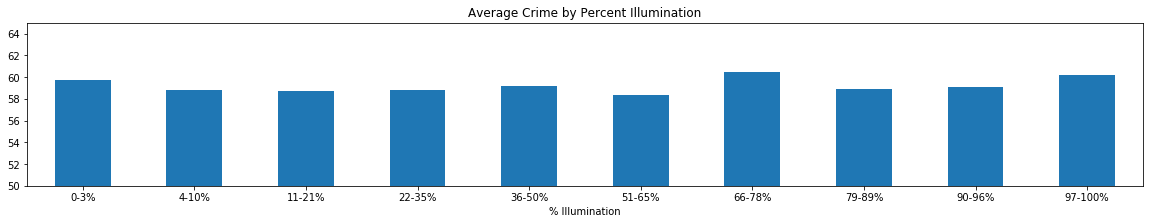

In [20]:
# Use DataFrame.plot() in order to create a bar chart of the data
mpls_summary_new.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(50, 65), rot=0)

# Save plot
plt.savefig("mpls_avgcrime_percillum.png")

# Show plot
plt.show()

In [21]:
# Save summary data to csv
mpls_summary.to_csv("mpls_summary.csv")